In [2]:
import sys
!{sys.executable} -m pip install librosa
!{sys.executable} -m pip install music21
!{sys.executable} -m pip install torch-yin

  Created wheel for torch-yin: filename=torch_yin-0.1.3-py3-none-any.whl size=6450 sha256=3e34b644366d7217c08258a7a9eab5fe28b652d9ec9a28112d09bd2a707300af
  Stored in directory: c:\users\han1b\appdata\local\pip\cache\wheels\fc\6b\3d\676ec4a8d25a3690590c2d8d8120aeeea83780c89a23b96ec8
Successfully built torch-yin


In [16]:
import librosa
import music21

def infer_time_signature(audio_file):
  
    y, sr = librosa.load(audio_file)
    
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, onset_envelope=onset_env)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    stream = music21.stream.Stream()
    for beat_time in beat_times:
        stream.append(music21.note.Note(beat_time))  
    
    ts = music21.meter.bestTimeSignature(stream)
    
    return ts

In [17]:
audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
time_signature = infer_time_signature(audio_file)
print("Inferred time signature:", time_signature)

Inferred time signature: <music21.meter.TimeSignature 94/4>


In [18]:
import librosa

audio_file = librosa.load("C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3")
y, sr = audio_file

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

Estimated tempo: 107.67 beats per minute


array([ 0.16253968,  0.74303855,  1.30031746,  1.85759637,  2.41487528,
        2.9721542 ,  3.52943311,  4.06349206,  4.64399093,  5.17804989,
        5.7353288 ,  6.29260771,  6.84988662,  7.40716553,  7.96444444,
        8.52172336,  9.07900227,  9.63628118, 10.19356009, 10.72761905,
       11.28489796, 11.84217687, 12.39945578, 12.95673469, 13.51401361,
       14.07129252, 14.62857143, 15.18585034, 15.74312925, 16.30040816,
       16.85768707, 17.39174603, 17.94902494, 18.52952381, 19.06358277,
       19.62086168, 20.17814059, 20.7354195 , 21.29269841, 21.84997732,
       22.40725624, 22.96453515, 23.52181406, 24.07909297, 24.63637188,
       25.19365079, 25.75092971, 26.30820862, 26.84226757, 27.39954649,
       27.9568254 , 28.51410431, 29.07138322, 29.62866213, 30.18594104,
       30.74321995, 31.30049887, 31.85777778, 32.41505669, 32.9723356 ,
       33.52961451, 34.06367347, 34.62095238, 35.17823129, 35.7355102 ,
       36.29278912, 36.85006803, 37.40734694, 37.96462585, 38.52

Estimated tempo: 107.67 beats per minute


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 20.027946  , 15.238395  ,  2.4919834 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.7880831 , 10.330223  ,  0.24089098,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.6513081 ,  8.486234  ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

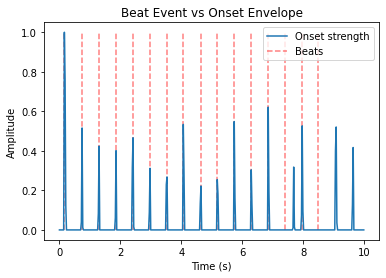

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
y, sr = librosa.load(audio_file, duration=10)

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)

tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beats, sr=sr)


hop_length = 512
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.title("Beat Event vs Onset Envelope")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
onset_env

[0.16253968 0.71981859 1.27709751 1.83437642 2.39165533 2.94893424
 3.50621315 4.06349206 4.62077098 5.17804989 5.7353288  6.29260771
 6.84988662 7.66258503 7.94122449 9.05578231 9.61306122]


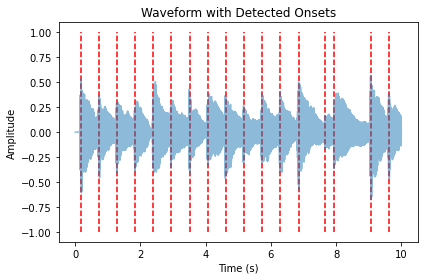

[0.16253968 0.71981859]
[tensor([ 73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.7458,  73.7458,  73.7458,  73.7458,  73.7458,  73.7458,  73.7458,
        147.0000, 147.0000, 147.0000,  73.7458]), tensor([74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424,
        74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424,
        74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933,  0.0

In [24]:
#YIN Algorithm Test
import torch
import torchyin

#FS = 48000

#s = torch.sin(2 * torch.pi * 440 / FS * torch.arange(FS))

#pitch = torchyin.estimate(s, sample_rate=FS)

#print("Fundamental Freq:")
#pitch[0]

audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
y, sr = librosa.load(audio_file, duration=10)
#o_env = librosa.onset.onset_strength(y=y, sr=sr)
#times = librosa.times_like(o_env, sr=sr)
onset_times = librosa.onset.onset_detect(y=y, sr=sr, units='time')
print(onset_times)
plt.plot(np.arange(len(y)) / sr, y, alpha=0.5)
plt.vlines(onset_frames, -1, 1, color='r', linestyle='--')
plt.title('Waveform with Detected Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print(onset_times[0:2])
#for i in range(np.arange(len(y)) / sr)
   # window = onset_frame[i:i+1]
   # pitch = torchyin.estimate(y, sample_rate=FS)

pitch_estimates = []

# Iterate over onset times
for i in range(len(onset_times)-1):
    # Calculate window start and end indices based on onset times
    window_start = int(onset_times[i] * sr)  # Convert onset time to sample index
    window_end = int(onset_times[i+1] * sr)  # Convert next onset time to sample index

    # Apply window function to the segment of the signal
    windowed_signal = y[window_start:window_end]

    # Estimate pitch for the windowed segment
    pitch = torchyin.estimate(windowed_signal, sample_rate=sr)
    
    # Append pitch estimate to the list
    pitch_estimates.append(pitch)

# Print pitch estimates for each windowed segment
print(pitch_estimates)


tensor([  27.5072,   29.1262,   30.8682,   32.6975,   34.6570,   36.6973,
          38.8979,   41.2017,   43.6364,   46.2428,   48.9796,   51.8919,
          54.9828,   58.2524,   61.6967,   65.3951,   69.2641,   73.3945,
          77.7958,   82.4742,   87.2727,   92.4855,   97.9592,  103.8961,
         110.0917,  116.5049,  123.3933,  130.7902,  138.7283,  146.7890,
         155.3398,  164.9485,  174.5455,  185.3282,  195.9184,  207.7922,
         220.1835,  233.0097,  247.4227,  262.2951,  277.4566,  294.4785,
         311.6883,  328.7671,  350.3650,  369.2308,  393.4426,  413.7931,
         440.3669,  466.0194,  494.8453,  521.7391,  551.7241,  585.3658,
         623.3766,  657.5342,  695.6522,  738.4615,  786.8852,  827.5862,
         872.7272,  941.1765,  979.5918, 1043.4783, 1116.2791, 1170.7317,
        1230.7693, 1333.3334, 1411.7648, 1500.0000, 1548.3871, 1655.1724,
        1777.7778, 1846.1539, 2000.0000, 2086.9565, 2181.8184, 2400.0000,
        2526.3159, 2666.6667, 2823.529